<a href="https://colab.research.google.com/github/saraibare/3.-Valores-atipicos/blob/main/Act_3_1_Valores_at%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

Saving VentasTotales1.csv to VentasTotales1.csv


{'VentasTotales1.csv': b',indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,ventas_totales_grupo_articulos,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros\n0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,10230100.13,6864575.384,9047205.493,1716991.073,27858872.08,18043789.16,3514467.398,6705475.318,945906.3068,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309\n1,01/02/2017,25994.2,25223.4,25994200.17,25749179.4,245020.769,25994200.17,9719067.341,6438494.011,8309150.301,1527488.518,25994200.17,17656879.08,3344456.931,6576624.803,925618.6147,2855639.9,2600083.591,1026166.544,328288.6951,40

In [2]:
data= pd.read_csv('VentasTotales1.csv') 
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros           

## **Métodos para eliminar outliers**

### **Ventas precios corrientes**

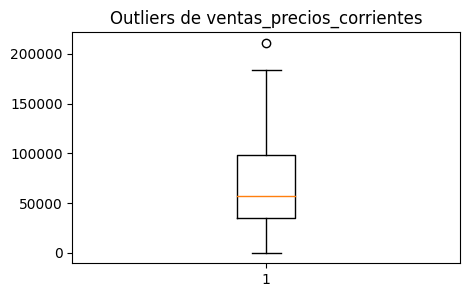

In [3]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["ventas_precios_corrientes"]) 
plt.title("Outliers de ventas_precios_corrientes")
plt.show()

In [4]:
#DESVIACIÓN ESTÁNDAR
y=data["ventas_precios_corrientes"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


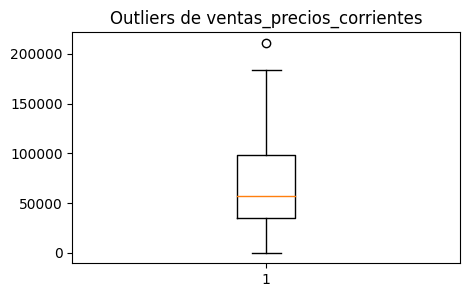

In [5]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["ventas_precios_corrientes"]) 
plt.title("Outliers de ventas_precios_corrientes")
plt.show()

In [6]:
#MÉTODO DE IQR
y=data["ventas_precios_corrientes"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr1= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,81140696.22,76413721.76,4726974.457,81140696.22,24935747.29,22143208.63,...,23393038.41,2630487.791,9592798.115,8463266.123,2712593.828,518942.5376,11217153.19,2502616.619,6125265.839,5935993.913


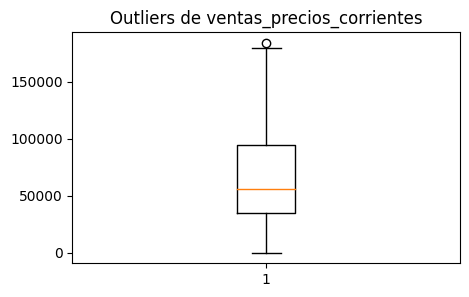

In [7]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr1["ventas_precios_corrientes"]) 
plt.title("Outliers de ventas_precios_corrientes")
plt.show()

In [8]:
data_clean_iqr1.to_csv("ventas_precios_corrientes.csv")
files.download("ventas_precios_corrientes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Ventas precios constantes**

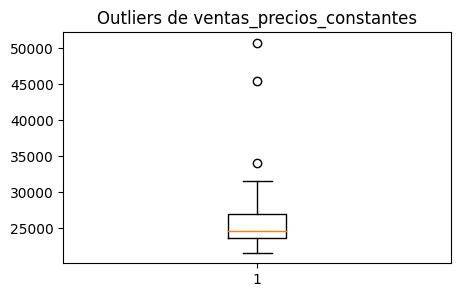

In [9]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["ventas_precios_constantes"]) 
plt.title("Outliers de ventas_precios_constantes")
plt.show()

In [10]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["ventas_precios_constantes"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4726974.457,8.114070e+07,24935747.29,22143208.63,...,23393038.41,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,11217153.19,2502616.619,6.125266e+06,5.935994e+06
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4819479.554,1.545171e+08,46962602.22,46053650.13,...,37505172.62,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,21330213.29,3782646.219,1.218755e+07,1.343307e+07


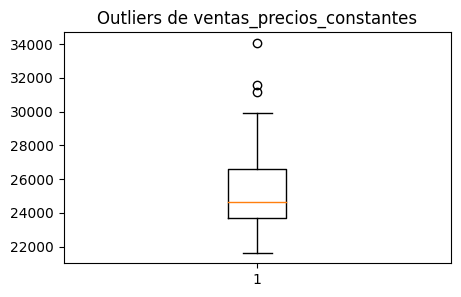

In [11]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["ventas_precios_constantes"]) 
plt.title("Outliers de ventas_precios_constantes")
plt.show()

In [12]:
#MÉTODO DE IQR
y=data["ventas_precios_constantes"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr2= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
11,11,01/12/2017,40766.3,34084.5,4.076632e+07,4.032029e+07,4.460368e+05,4.076632e+07,13710305.37,11070098.74,...,9.667850e+06,1346130.813,3.684165e+06,3.674954e+06,1398334.689,4.762751e+05,5.239243e+06,1278355.018,2.857323e+06,4.502834e+06
42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4.726974e+06,8.114070e+07,24935747.29,22143208.63,...,2.339304e+07,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,1.121715e+07,2502616.619,6.125266e+06,5.935994e+06
60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,46962602.22,46053650.13,...,3.750517e+07,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,2.133021e+07,3782646.219,1.218755e+07,1.343307e+07


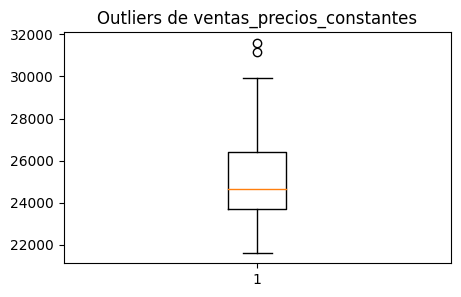

In [13]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr2["ventas_precios_constantes"]) 
plt.title("Outliers de ventas_precios_constantes")
plt.show()

In [14]:
data_clean_iqr2.to_csv("ventas_precios_constantes.csv")
files.download("ventas_precios_constantes.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **salon_ventas**

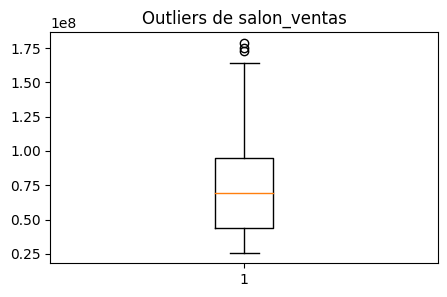

In [15]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["salon_ventas"]) 
plt.title("Outliers de salon_ventas")
plt.show()

In [16]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["salon_ventas"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


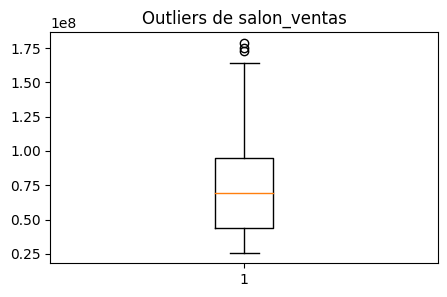

In [17]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["salon_ventas"]) 
plt.title("Outliers de salon_ventas")
plt.show()

In [18]:
#MÉTODO DE IQR
y=data["salon_ventas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr3= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


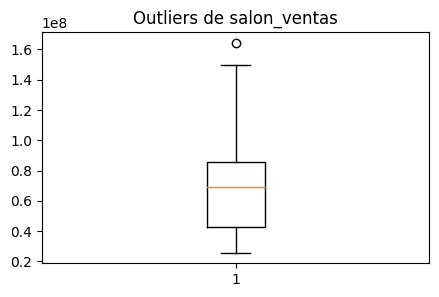

In [19]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr3["salon_ventas"]) 
plt.title("Outliers de salon_ventas")
plt.show()

In [20]:
data_clean_iqr3.to_csv("salon_ventas.csv")
files.download("salon_ventas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **tarjetas_debito**

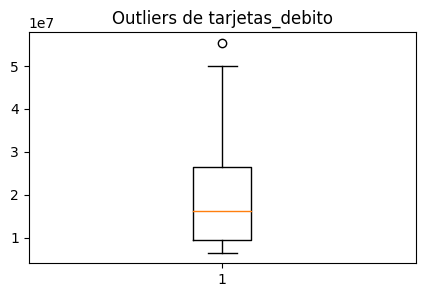

In [21]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["tarjetas_debito"]) 
plt.title("Outliers de tarjetas_debito")
plt.show()

In [22]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["tarjetas_debito"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


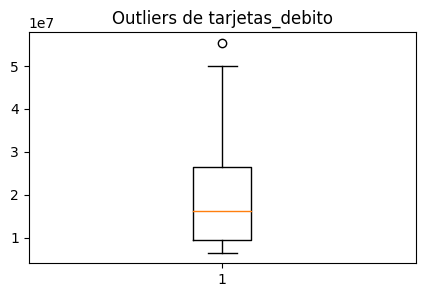

In [23]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["tarjetas_debito"]) 
plt.title("Outliers de tarjetas_debito")
plt.show()

In [24]:
#MÉTODO DE IQR
y=data["tarjetas_debito"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr4= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


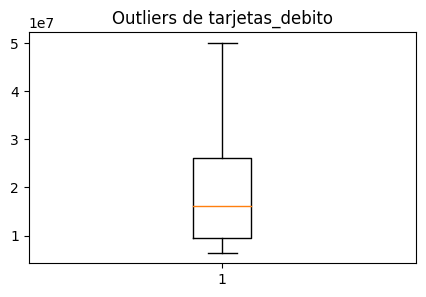

In [25]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr4["tarjetas_debito"]) 
plt.title("Outliers de tarjetas_debito")
plt.show()

In [26]:
data_clean_iqr4.to_csv("tarjetas_debito.csv")
files.download("tarjetas_debito.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **tarjetas_credito**

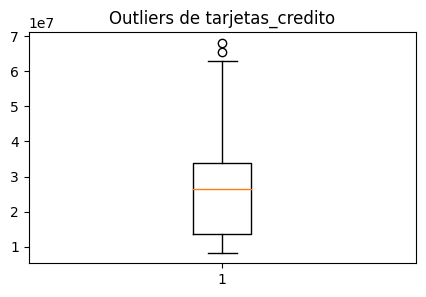

In [28]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["tarjetas_credito"]) 
plt.title("Outliers de tarjetas_credito")
plt.show()

In [29]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["tarjetas_credito"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


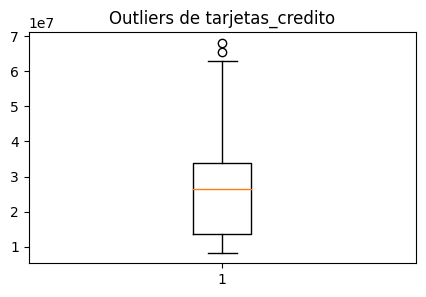

In [30]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["tarjetas_credito"]) 
plt.title("Outliers de tarjetas_credito")
plt.show()

In [31]:
#MÉTODO DE IQR
y=data["tarjetas_credito"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr5= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


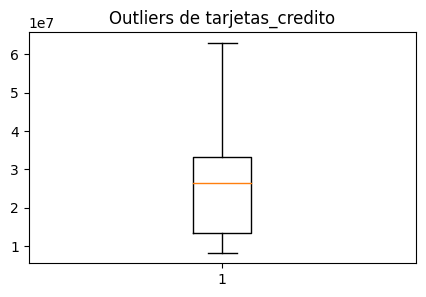

In [32]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr5["tarjetas_credito"]) 
plt.title("Outliers de tarjetas_credito")
plt.show()

In [33]:
data_clean_iqr5.to_csv("tarjetas_credito.csv")
files.download("tarjetas_credito.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **bebidas**

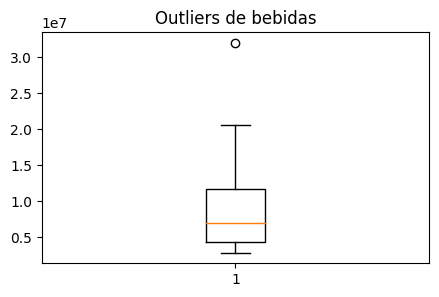

In [34]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["bebidas"]) 
plt.title("Outliers de bebidas")
plt.show()

In [35]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["bebidas"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


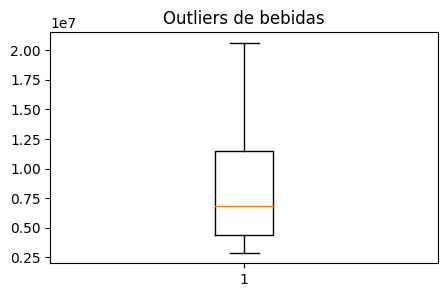

In [36]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["bebidas"]) 
plt.title("Outliers de bebidas")
plt.show()

In [37]:
#MÉTODO DE IQR
y=data["bebidas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr6= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


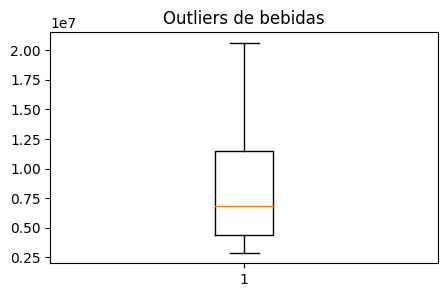

In [38]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr6["bebidas"]) 
plt.title("Outliers de bebidas")
plt.show()

In [39]:
data_clean_iqr6.to_csv("bebidas.csv")
files.download("bebidas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **panaderia**

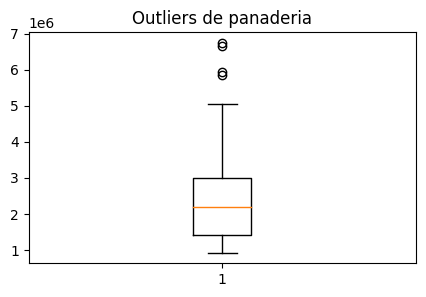

In [40]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["panaderia"]) 
plt.title("Outliers de panaderia")
plt.show()

In [41]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["panaderia"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


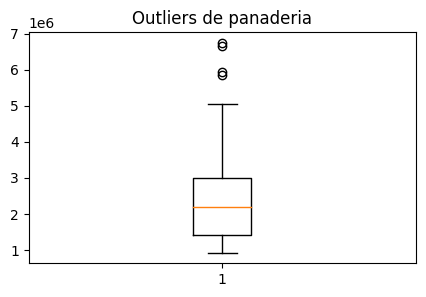

In [42]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["panaderia"]) 
plt.title("Outliers de panaderia")
plt.show()

In [43]:
#MÉTODO DE IQR
y=data["panaderia"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr7= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,4634783.40
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


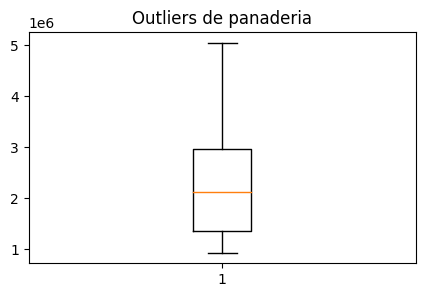

In [44]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr7["panaderia"]) 
plt.title("Outliers de panaderia")
plt.show()

In [45]:
data_clean_iqr7.to_csv("panaderia.csv")
files.download("panaderia.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **lacteos**

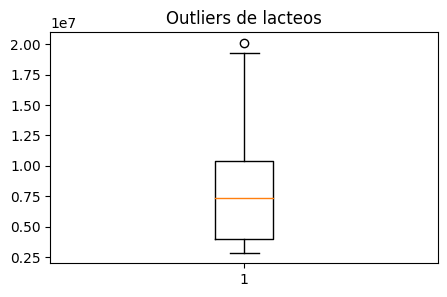

In [46]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["lacteos"]) 
plt.title("Outliers de lacteos")
plt.show()

In [47]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["lacteos"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


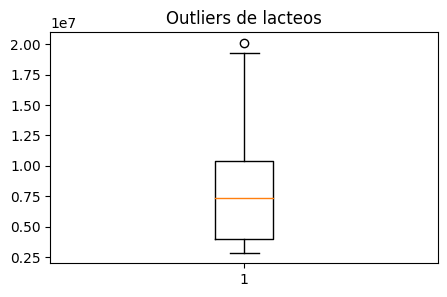

In [48]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["lacteos"]) 
plt.title("Outliers de lacteos")
plt.show()

In [49]:
#MÉTODO DE IQR
y=data["lacteos"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr8= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


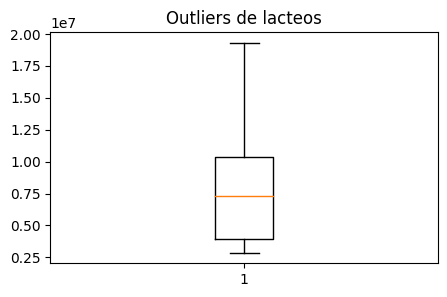

In [50]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr8["lacteos"]) 
plt.title("Outliers de lacteos")
plt.show()

In [51]:
data_clean_iqr8.to_csv("lacteos.csv")
files.download("lacteos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **verduleria_fruteria**

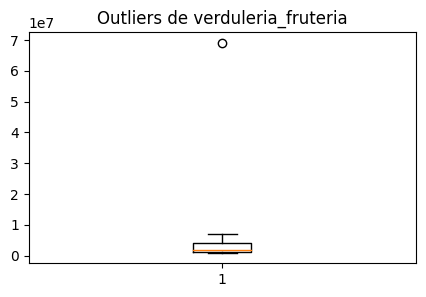

In [52]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["verduleria_fruteria"]) 
plt.title("Outliers de verduleria_fruteria")
plt.show()

In [53]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["verduleria_fruteria"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
46,46,01/11/2020,200.5,24010.7,91093507.31,86255330.61,4838176.706,91093507.31,28832513.45,23551887.33,...,23577259.62,2712393.487,9625513.239,9366000.915,69104127.6,630822.706,12606465.75,2071758.234,7962443.79,7539583.62


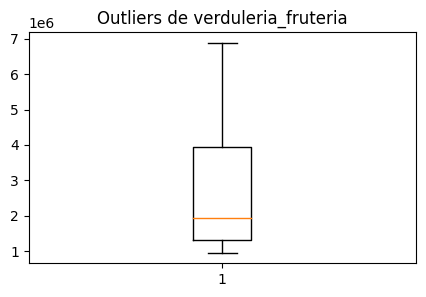

In [54]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["verduleria_fruteria"]) 
plt.title("Outliers de verduleria_fruteria")
plt.show()

In [55]:
#MÉTODO DE IQR
y=data["verduleria_fruteria"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr9= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
46,46,01/11/2020,200.5,24010.7,91093507.31,86255330.61,4838176.706,91093507.31,28832513.45,23551887.33,...,23577259.62,2712393.487,9625513.239,9366000.915,69104127.6,630822.706,12606465.75,2071758.234,7962443.79,7539583.62


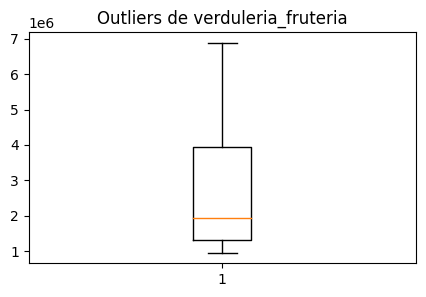

In [56]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr9["verduleria_fruteria"]) 
plt.title("Outliers de verduleria_fruteria")
plt.show()

In [57]:
data_clean_iqr9.to_csv("verduleria_fruteria.csv")
files.download("verduleria_fruteria.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **alimentos_preparados_rotiseria**

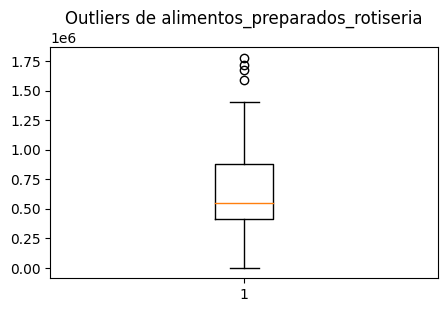

In [58]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["alimentos_preparados_rotiseria"]) 
plt.title("Outliers de alimentos_preparados_rotiseria")
plt.show()

In [59]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["alimentos_preparados_rotiseria"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


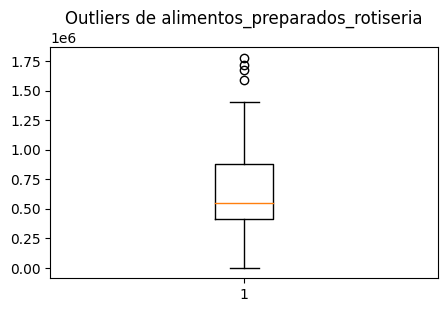

In [60]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["alimentos_preparados_rotiseria"]) 
plt.title("Outliers de alimentos_preparados_rotiseria")
plt.show()

In [61]:
#MÉTODO DE IQR
y=data["alimentos_preparados_rotiseria"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr10= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,47364363.88,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,4634783.40
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,11910475.62
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


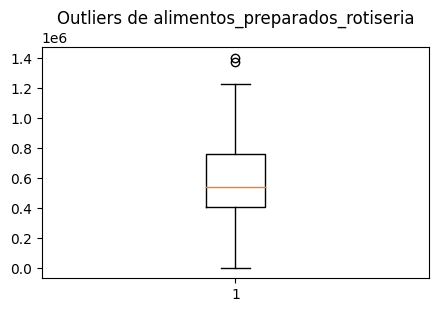

In [62]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr10["alimentos_preparados_rotiseria"]) 
plt.title("Outliers de alimentos_preparados_rotiseria")
plt.show()

In [63]:
data_clean_iqr10.to_csv("alimentos_preparados_rotiseria.csv")
files.download("alimentos_preparados_rotiseria.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **indumentaria_calzado_textiles_hogar**

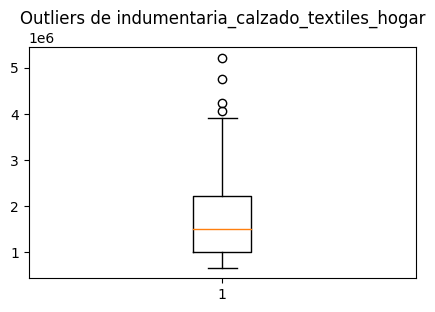

In [64]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de indumentaria_calzado_textiles_hogar")
plt.show()

In [65]:
#DESVIACIÓN ESTÁNDAR
y=data["indumentaria_calzado_textiles_hogar"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


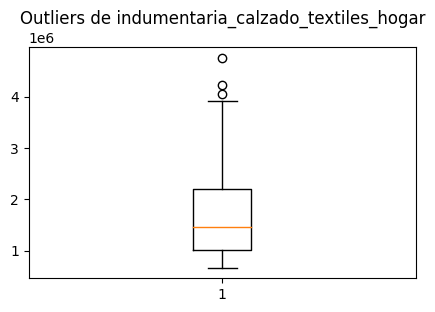

In [66]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de indumentaria_calzado_textiles_hogar")
plt.show()

In [67]:
#MÉTODO DE IQR
y=data["indumentaria_calzado_textiles_hogar"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr11= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
54,54,01/07/2021,125658.6,24779.5,125658552.5,120904098.3,4754454.215,125658552.5,37973547.56,37146178.90,...,34683058.37,4322896.980,14292062.10,15147184.63,3985101.607,1052052.786,15724007.71,4051857.507,9222787.62,9.421771e+06
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,1.666512e+07
63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4144283.743,177148082.8,53189998.68,50063972.79,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,12039595.55,1.191048e+07
64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,49886787.86,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,1.234998e+07


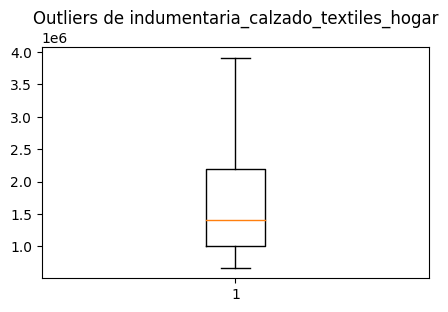

In [68]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr11["indumentaria_calzado_textiles_hogar"]) 
plt.title("Outliers de indumentaria_calzado_textiles_hogar")
plt.show()

In [69]:
data_clean_iqr11.to_csv("indumentaria_calzado_textiles_hogar.csv")
files.download("indumentaria_calzado_textiles_hogar.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **otros**

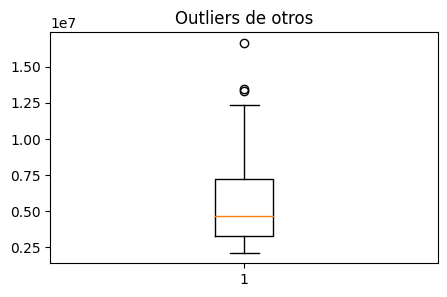

In [70]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["otros"]) 
plt.title("Outliers de otros")
plt.show()

In [71]:
#DESVIACIÓN ESTÁNDAR
#Método aplicando desviación estandar. Encuentro los valores extremos
#Encuentra más outliers
y=data["otros"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


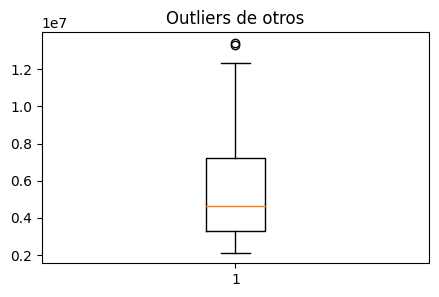

In [72]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["otros"]) 
plt.title("Outliers de otros")
plt.show()

In [73]:
#MÉTODO DE IQR
y=data["otros"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

data_clean_iqr12= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,55432191.37,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,1.266927e+07,16665123.15
60,60,01/01/2022,154517.1,45463.4,154517094.2,149697614.6,4819479.554,154517094.2,46962602.22,46053650.13,...,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219,1.218755e+07,13433071.98
61,61,01/02/2022,152202.6,23802.1,152202573.4,148406529.3,3796044.076,152202573.4,46290956.21,45283575.25,...,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,3782646.219,9.189746e+06,13301387.17


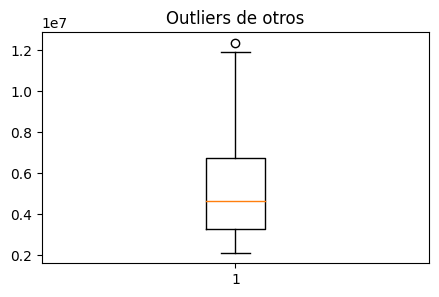

In [74]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr12["otros"]) 
plt.title("Outliers de otros")
plt.show()

In [75]:
data_clean_iqr12.to_csv("otros.csv")
files.download("otros.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>